## Table of Content

### 1. Introduction

- 1.1 Data Description
- 1.2 Objective of this project

### 2. Fetching Data

- 2.1 Import necessary Libraries
- 2.2 Import data

### 3. EDA
### 4. Encoding Dataframe
### 5. Describe the dataset
### 6. Checking Multicollinearity
### 7. Selecting Best Features
### 8. Data Balancing
### 9. Model Building

- 9.1 Logistic Regression
- 9.2 Random Forest Classifier
- 9.3 Gradient Boosting Classifier
- 9.4 SVC
- 9.5 KNN

### 10. Selecting Best Model
### 11. Hyperparameter Tuning
### 12. ROC_AUC Curve
### 13. Documenting The Finding
### 14. Model Save

## 1. Introduction
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


### 1.1 Data Description
#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### 1.2 Objective of this Project

- The goal of this machine learning project is to predict the Attrition.
- This is the classification problem

## 2. Fetching Data

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### 2.2 Importing dataset

In [4]:
data = pd.read_csv("D://WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

### Droping Duplicates

In [6]:
data.drop_duplicates()
data.shape

(1470, 35)

- No duplicates values are present.

### Checking unique values

In [7]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# 3. EDA

### Checking Null Values

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

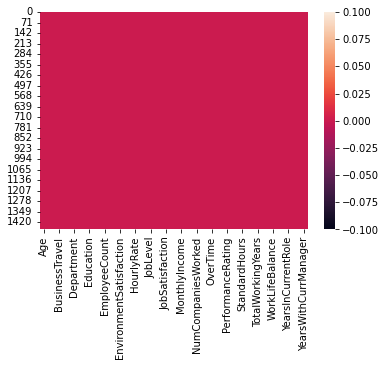

In [9]:
sns.heatmap(data.isnull())

- We can see there is no null values present in dataset.

### Checking all information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 - No null value present.
 - Datatype is ok with respect to their column.

# Visualization of the data

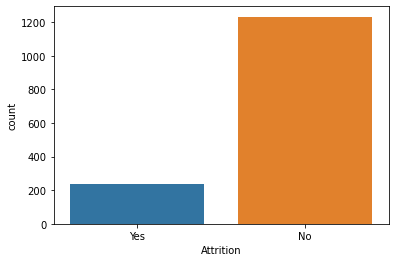

In [11]:
sns.countplot(x='Attrition',data=data)
plt.show()

 - We can see,There is low yes attrition, It means there is no problematic. If attrition is high then its problematic.
 - There is less employees whose leave the job or thier attrition is yes.

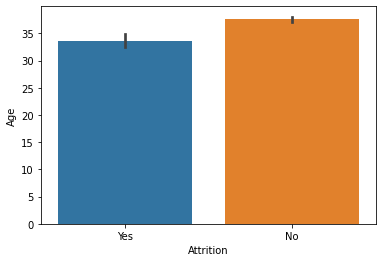

In [12]:
# Comaprision between Attrition and Age
sns.barplot(x='Attrition',y='Age',data=data)
plt.show()

 - We can see, Whose says 'No' their age comparatively is high.
 - Most of the employees lies in the range of 0 to 32.

<AxesSubplot:xlabel='Age', ylabel='count'>

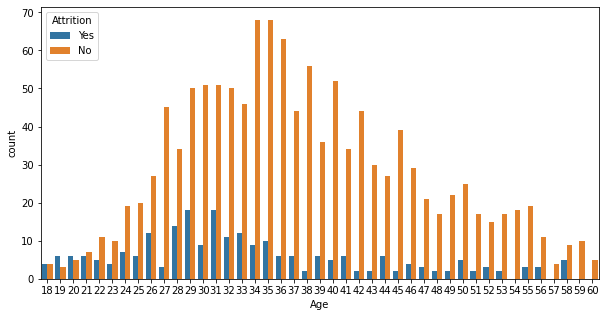

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Attrition',data=data)

- We can see that the most common age of employees is around 30 - 40
- We can see, age from 26 to 32 they are more willing to leave the company. But in the same age group they are less employees are willing to leave.
- upto the age of 30 Attrition 'Yes' is in increasing in nature. After the age of 30 Attrition 'Yes' is decreasing in nature.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

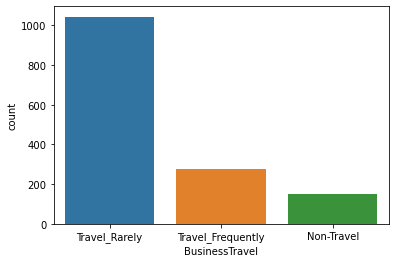

In [14]:
sns.countplot(x='BusinessTravel',data=data)

 - We can see, Employees Travel_rarely is high.
 - Non_Travel is low.

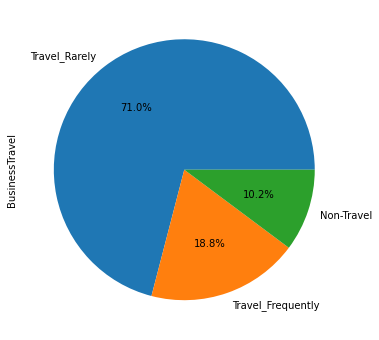

In [15]:
a = data['BusinessTravel'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

 - We can see, There are 71% employees are Rarely doing business travel.
 - 10.2% employees are not doing business travel.

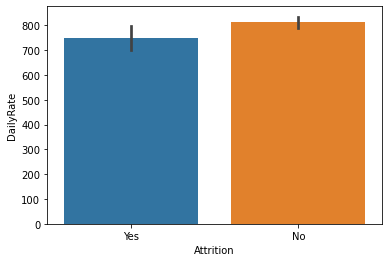

In [16]:
# Comaprision between Attrition and DailyRate 
sns.barplot(x='Attrition',y='DailyRate',data=data)
plt.show()

 - Whose says 'No' their DailyRate is high.
 - Attrition Yes has comparatively low daily rate.

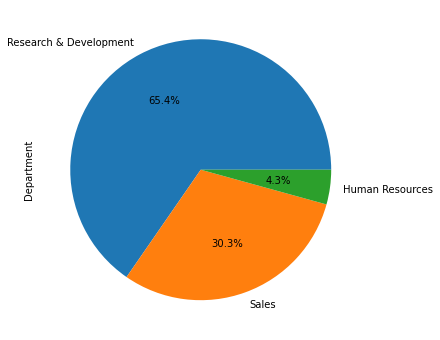

In [17]:
a = data['Department'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

 - We can see, R and D Department has 65.4% of manpower.
 - HR has 4.3% of Employees are worked.

<AxesSubplot:xlabel='Department', ylabel='count'>

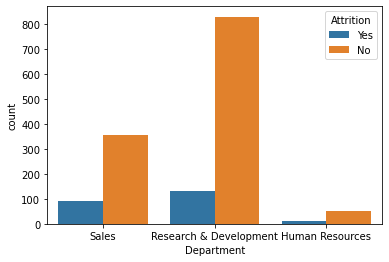

In [18]:
sns.countplot(x='Department',hue='Attrition',data=data)

 - R&D department has highest No. It means that,employee whose working in this department are willing to leave job.
 - HR depatment has lowest Attrition rate.
 - In the sales, 340 employees want to leave and around 100 employees are want to stay. The attrition ratio is less.

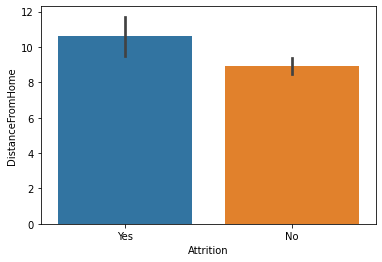

In [19]:
# Comaprision between Attrition and DiatanceFromHome 
sns.barplot(x='Attrition',y='DistanceFromHome',data=data)
plt.show()

- Distance from home is affecting Attrition rate. It increases Yes attrition.
- Those stay far away from office they may left the company.

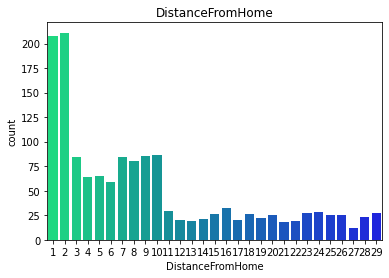

In [20]:
sns.countplot(x= 'DistanceFromHome' ,data =data ,palette='winter_r')
plt.title('DistanceFromHome')
plt.show()

 - As we can see,most of the employee may have come from 2km. Becouse it has higher in number followed by 1.
 - Very less employee come drom more distance 16km.

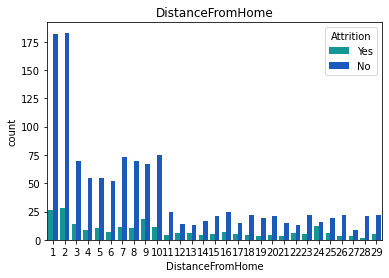

In [21]:
sns.countplot(x= 'DistanceFromHome' ,data =data ,palette='winter_r',hue='Attrition')
plt.title('DistanceFromHome')
plt.show()

- We can see, distance from home is greter than 7km they have little increasing of Attrition but not of that much of affecting company.

<AxesSubplot:xlabel='Education', ylabel='count'>

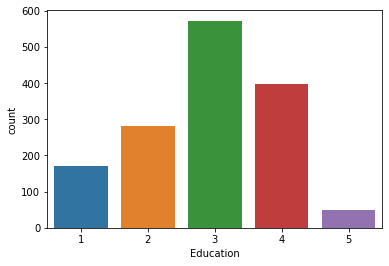

In [22]:
sns.countplot(x='Education',data=data)

- Education 3 meant Bachelor degree
- Whose have Bachelor degree their are more followed by 4.
- Doctor degree has low employees.

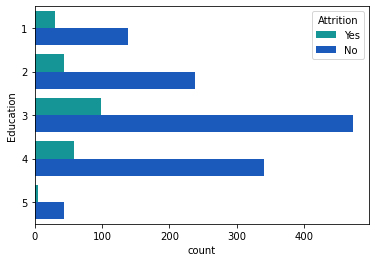

In [23]:
sns.countplot(y= 'Education' ,data = data ,palette='winter_r'  ,hue ='Attrition')
plt.show()

 - Education 3 it means Bachelor degree holding employees are high willing to left the job.
 - Education 5, it means doctor employees are low willing to left job. 

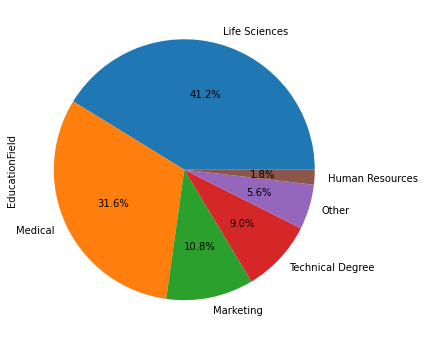

In [24]:
a = data['EducationField'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can says that, 41.2% employees is having life Sciences as education field.
- 31.6% employess is having medical as education field.
- 1.8% employyes is having HR education field.

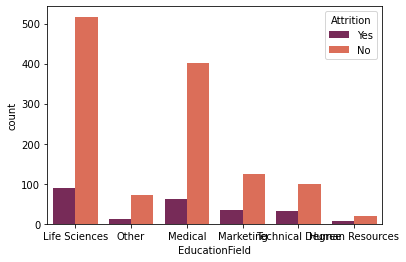

In [25]:
sns.countplot(x='EducationField',data=data, hue='Attrition',palette='rocket')
plt.show()

- We can see, Upto 100 employee whose belong to Life science Education field are wnat leave. But 500 employees want to stay.
- But difference between Yes and No are big.
- At 2nd Medical education field employee want to leave.

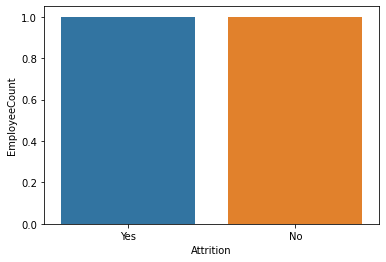

In [26]:
# Comaprision between Attrition and EmployeeCount 
sns.barplot(x='Attrition',y='EmployeeCount',data=data)
plt.show()

 - We can see, Attirtion with respect to EmployeeCount is same.

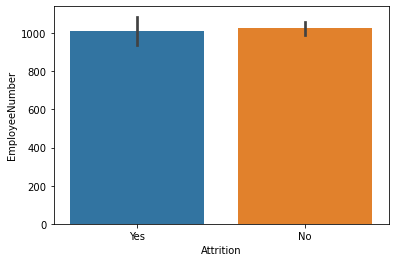

In [27]:
# Comaprision between Attrition and EmployeeCount 
sns.barplot(x='Attrition',y='EmployeeNumber',data=data)
plt.show()

- We can see, Attirtion with respect to Employeenumber is same.

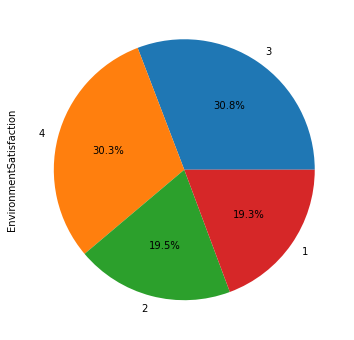

In [28]:
a = data['EnvironmentSatisfaction'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- I considered EmployeeSatisfaction numbers as rating.
- 30.8% Employees gives rating 3.
- 30.3% employees gives rating 4.

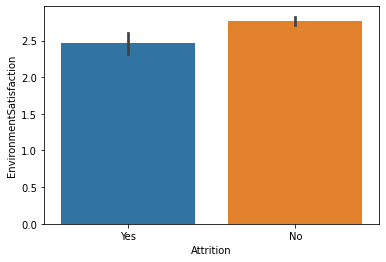

In [29]:
# Comaprision between Attrition and EmployeeCount 
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',data=data)
plt.show()

- Those employees are not want to leave their environment satisfaction is high.
- Both Attrition have equally distributed upto 2.3.

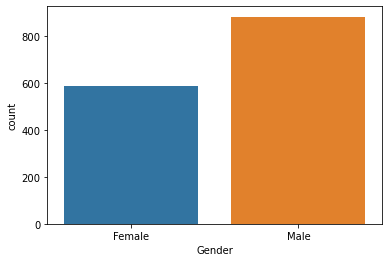

In [30]:
sns.countplot(x='Gender',data=data)
plt.show()

- We can see, male employee are more than female. 

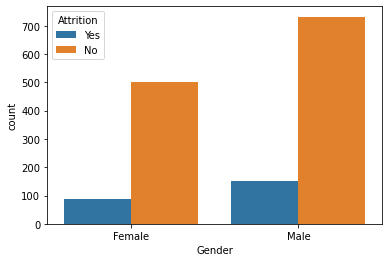

In [31]:
sns.countplot(x='Gender',data=data,hue='Attrition')
plt.show()

- We can see,around 170 male employee are want to leave a company. But more than 700 male employee want to stay.
- But in female upto 500 employee dont want to leave a company.
- If we talking about both gender, the male has highest proportion whose wnat to leave.

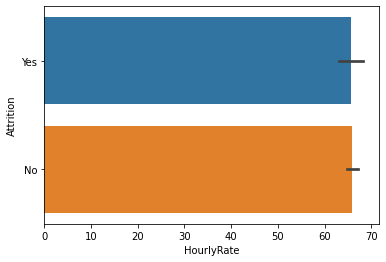

In [32]:
sns.barplot(x='HourlyRate',data=data,y='Attrition')
plt.show()

 - We can see, HourlyRate for both attrition is same.

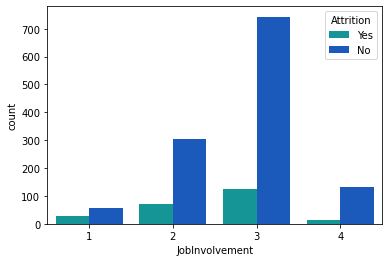

In [33]:
sns.countplot(x='JobInvolvement',data=data,hue='Attrition',palette='winter_r')
plt.show()

 - There is huge difference between Yes and No in JobInvolvement 3.
 - In the 3, Those are dont to leave is high. 

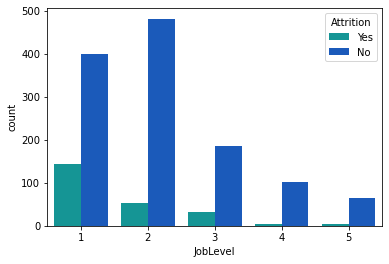

In [34]:
sns.countplot(x='JobLevel',data=data,hue='Attrition', palette='winter_r')
plt.show()

 - Whose JobLevel is 1, upto 140 employee want to leave.
 - There are least employee from joblebel 2 want to leave.

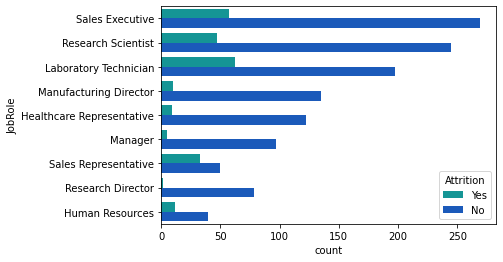

In [35]:
sns.countplot(y= 'JobRole' ,data = data ,palette='winter_r'  ,hue ='Attrition')
plt.show()

 - We can see, laboratory technician has a higher Attrition Yes. It means they want to leave.
 - Whose having a sales Executive as job role, those least are willing to leave.
 - Research Director has low proportion in job role.

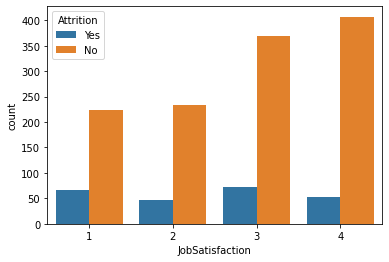

In [36]:
sns.countplot(x='JobSatisfaction',data=data,hue='Attrition')
plt.show()

 - In JobSatisfaction 1 have least difference between Yes and No.
 - In JobSatisfaction 4 has highest employees are not want to leave.
 - Job satisfaction whose says No is in increasing in nature.

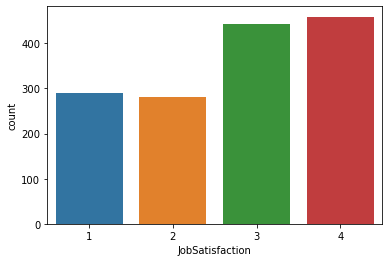

In [37]:
sns.countplot(x='JobSatisfaction',data=data,)
plt.show()

- I considered as rating. Rating 4 is highest among the job satisfaction.

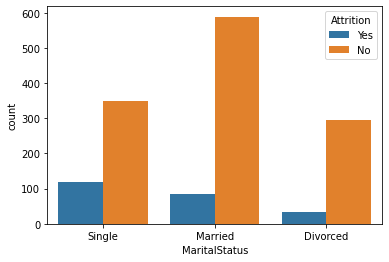

In [38]:
sns.countplot(x='MaritalStatus',data=data,hue='Attrition')
plt.show()

- We can see, Those employees are single mostly they willing to leave. Their proportion is high.
- Married employee has least difference between Yes and No.
- Married employee are least intresting to leave a job.
- Divorced has lowed Yes among all.

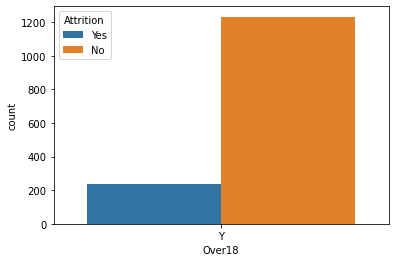

In [39]:
sns.countplot(x='Over18',data=data,hue='Attrition')
plt.show()

- We can see, In Over18 No has highest.
- Yes is having low empoyees are want to leave.

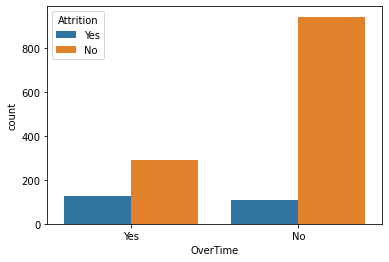

In [40]:
sns.countplot(x='OverTime',data=data,hue='Attrition')
plt.show()

 - Most of employees are dont want to do overtime.
 - But In No, thre is big difference between Attrition Yes and Attrition No.

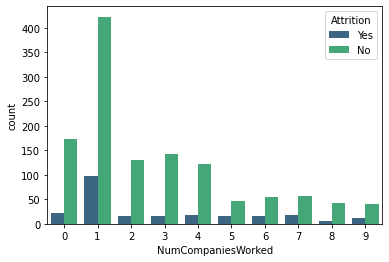

In [41]:
sns.countplot(x='NumCompaniesWorked',data=data,hue='Attrition', palette = 'viridis')
plt.show()

- Number of companies worked 1 is having highest proportion of Yes and No.
- Those employees whose worked only 1 companies they have highest chance to leave the company.
- We can see, those are worked more 6 they, are less willing to leave a company.

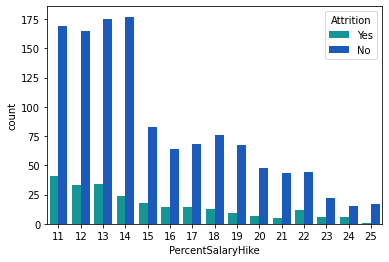

In [42]:
sns.countplot(x='PercentSalaryHike',data=data,hue='Attrition',palette='winter_r')
plt.show()

 - We can see, PercentSalaryHike is a decreasing in nature.
 - Employees have PercentSalaryHike less 14%, those employees are willing to leave.
 - PercentSalaryHike > 17, those are less willing to leave a company.

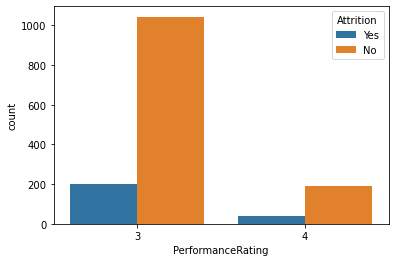

In [43]:
sns.countplot(x='PerformanceRating',data=data,hue='Attrition')
plt.show()

- The only two performace rating is have i.e. 3 and 4.
- Those employees is having performaceRating 3 they are more willing to leave a company.

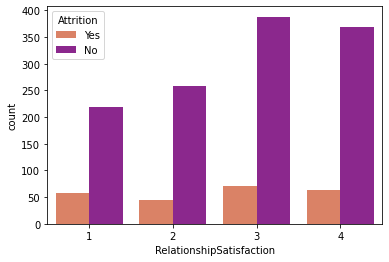

In [44]:
sns.countplot(x='RelationshipSatisfaction',data=data,hue='Attrition',palette='plasma_r')
plt.show()

- we can see,Those are says 'Yes' they all are having almost same relationship satisfaction.
- But those are have RS 3 they are willing to leave or stay.

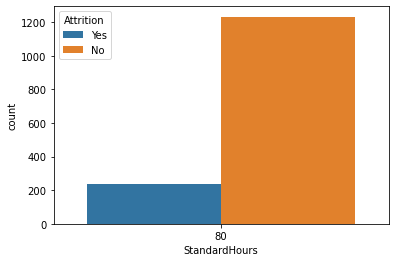

In [45]:
sns.countplot(x='StandardHours',data=data,hue='Attrition')
plt.show()

- We can see, StandardHours have only 80 for all employees.
- Upto 210 empoyees willing to leave company.

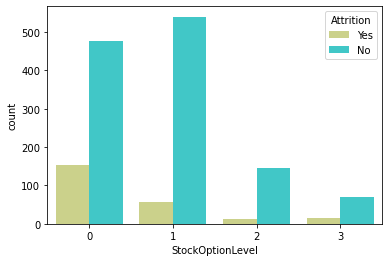

In [46]:
sns.countplot(x='StockOptionLevel',data=data,hue='Attrition',palette='rainbow_r')
plt.show()

- In the stockoptional level 0 has highest attrition 'Yes'.
- In the StockOptionLevel 1 has highest attrition 'No;.

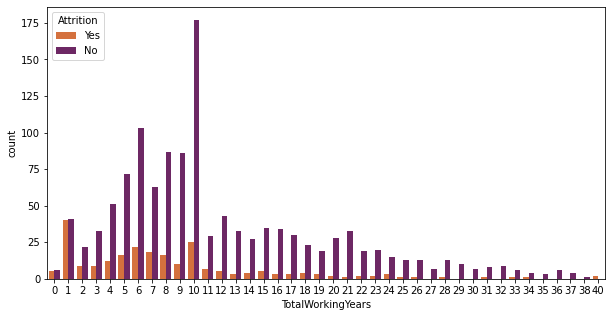

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='TotalWorkingYears',data=data,hue='Attrition',palette='inferno_r')
plt.show()

- We can see, upto 10 total working year is having same proportion of Attrition 'Yes' and 'No'. It means they are more willing to switch the company.
- But In total working year is 1, they haave highest among all to willing switch a company.
- After the 25 year of total working, there are very less employees to willing to leave. And they are in decreasing in nature.

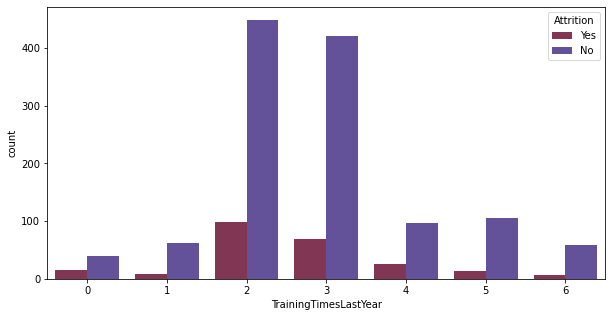

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='TrainingTimesLastYear',data=data,hue='Attrition',palette='twilight_r')
plt.show()

- We can see, those are having 2 TrainingTimesLastYear they more willing to switch the company.

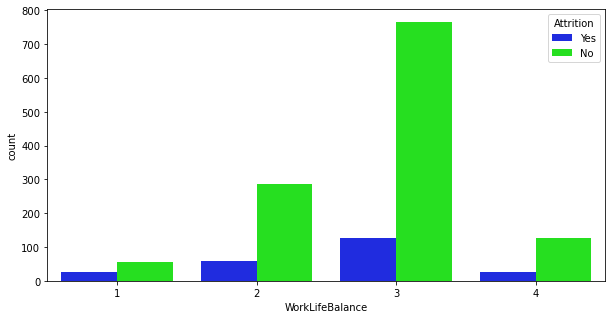

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='WorkLifeBalance',data=data,hue='Attrition',palette='hsv_r')
plt.show()

 - Worklife balance 2 has highest Both attrition.
 - But attrition "No' has higher than 'Yes'.

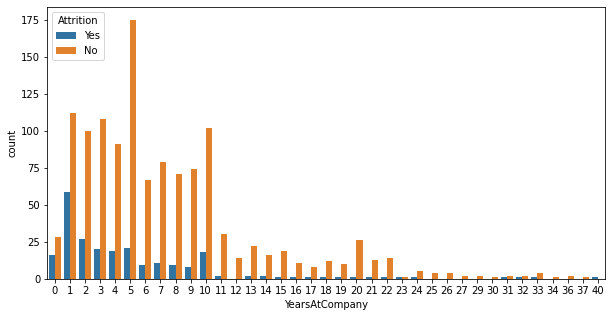

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsAtCompany',data=data,hue='Attrition')
plt.show()

- Year at company 5 has a highest attrition No. It means that they dont want to go.
- But upto 5 year at company, they are more willing to leave a company.
- After 17 year at company, they have almost all not willing to leave.

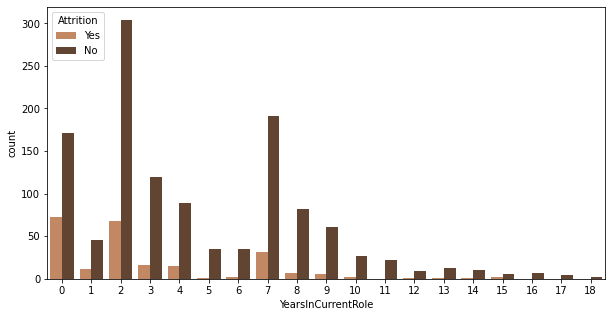

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsInCurrentRole',data=data,hue='Attrition',palette='copper_r')
plt.show()

- Those employee has spend 0 and 2 year at company they have more chance to leave to company becouse they spend 2 year at same role/ same position.
- After the 7 year since current role they have less chance to leave the company.

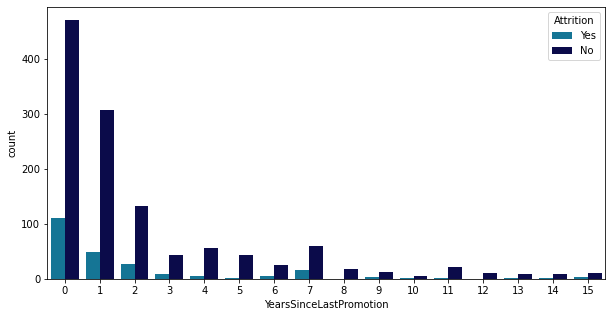

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsSinceLastPromotion',data=data,hue='Attrition',palette='ocean_r')
plt.show()

- Year since last promotion 0 has more willing to leave. But these are the fresher for the company. And Might they have start their career recently.
- After 3 year of last Promotion, they are less willing to switched.

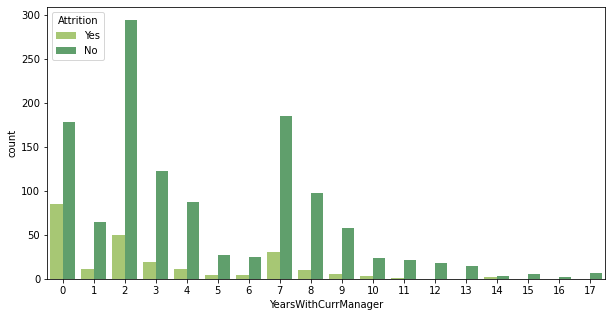

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='YearsWithCurrManager',data=data,hue='Attrition',palette='summer_r')
plt.show()

- We can see, those are spent more than 5 year with same manager, they are less willing to leave the company.
- But Those are spent 0 to 2 year with same manger they more willing to leave the company.

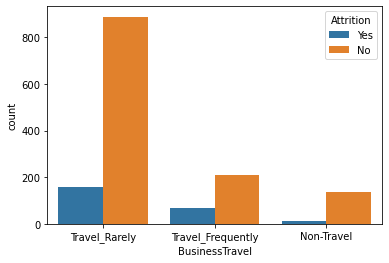

In [54]:
sns.countplot(x='BusinessTravel',data=data,hue='Attrition')
plt.show()

- We can see, Those employees are travel rarely they have higher in Attrition 'Yes'.
- But Those business travel frequenty they have less proportion of both Attrition.

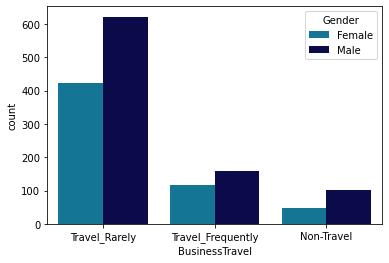

In [55]:
sns.countplot(x='BusinessTravel',data=data,hue='Gender',palette='ocean_r')
plt.show()

- Upto 120, Both gender are equally traveled.
- Male are more business travel than female.

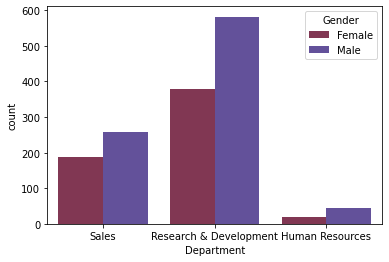

In [56]:
sns.countplot(x='Department',data=data,hue='Gender',palette='twilight_r')
plt.show()

- We can see, In Research and development department, female employees are more. At same department male are also more.
- Least employees in HR department.

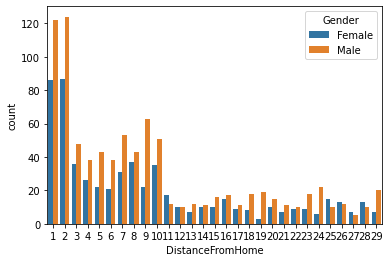

In [57]:
sns.countplot(x='DistanceFromHome',data=data,hue='Gender')
plt.show()

- Upto 5 distance from home, there is higher proportion male and female are come.

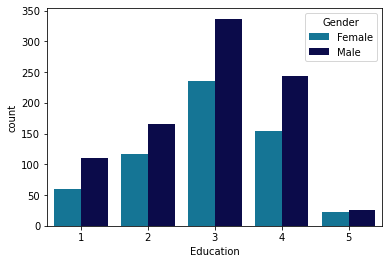

In [58]:
sns.countplot(x='Education',data=data,hue='Gender',palette='ocean_r')
plt.show()

- We can see, more female belong to education 4.
- More male belong to education 4.

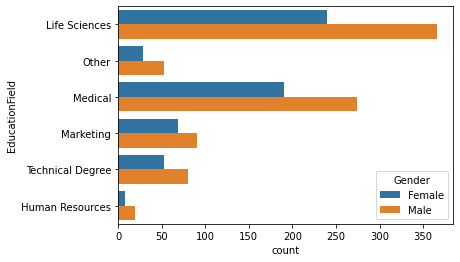

In [59]:
sns.countplot(y='EducationField',data=data,hue='Gender')
plt.show()

- We can see, Male and feamle are more in life sciences education field.

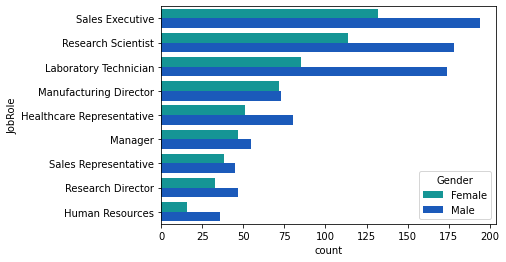

In [60]:
sns.countplot(y= 'JobRole' ,data = data ,palette='winter_r'  ,hue ='Gender')
plt.show()

- We can see, all jobrole are having decreasing in nature with respect to gender.
- But in Manufacturing directore male and female have almost equal proportion.

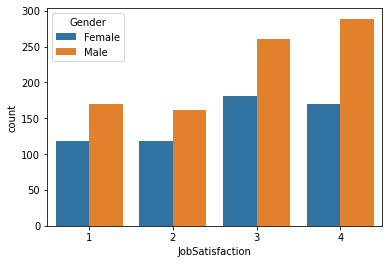

In [61]:
sns.countplot(x='JobSatisfaction',data=data,hue='Gender')
plt.show()

- male employees are having more job satisfaction then female.
- male job satisfaction is increasing in nature but feamle after 3 it slightly decreases.

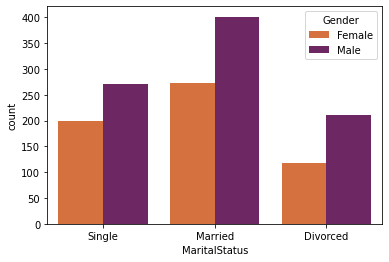

In [62]:
sns.countplot(x='MaritalStatus',data=data,hue='Gender',palette='inferno_r')
plt.show()

- we can see married male and female are more employees then other.
- Single marital status employees are equal upto 190.
- Divorced marital status employees are equal upto 110.

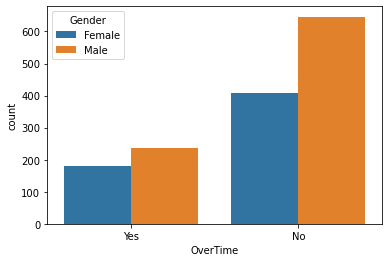

In [63]:
sns.countplot(x='OverTime',data=data,hue='Gender')
plt.show()

- We can see, upto 180 both male and female want to do Overtime.
- But male are more whose dont want to do overtime.

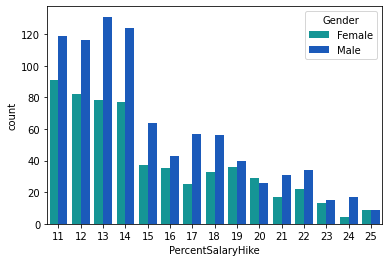

In [64]:
sns.countplot(x='PercentSalaryHike',data=data,hue='Gender', palette='winter_r')
plt.show()

 - In all PercentSalaryHike group male has a highest salary hike.
 - But in 25% salary hike, Both male and female proportion is same.

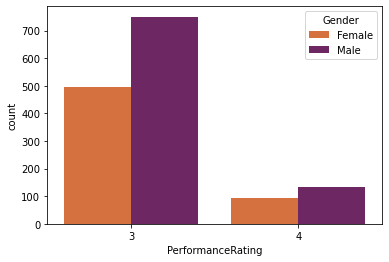

In [65]:
sns.countplot(x='PerformanceRating',data=data,hue='Gender',palette='inferno_r')
plt.show()

 - We can see male is having highest performance rating then female.

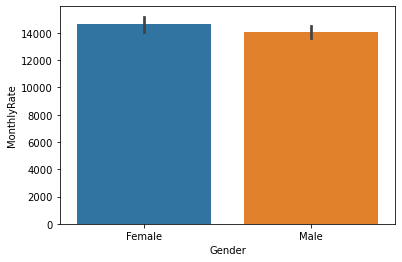

In [66]:
sns.barplot(x='Gender',y='MonthlyRate',data=data)
plt.show()

- We can see, pay gap detween both are very low.

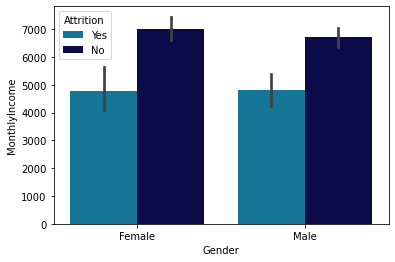

In [67]:
sns.barplot(x='Gender', y='MonthlyIncome',hue='Attrition',data=data,palette='ocean_r' )
plt.show()

- We can see, Those are having monthly income low they are more willing to leave.
- Females are more comparatively male are willing leave becouse their attrition Yes is high.
- Both male and female are having same pattern.

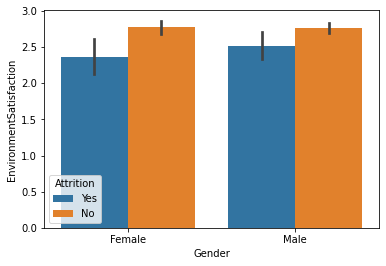

In [68]:
sns.barplot(x='Gender', y='EnvironmentSatisfaction',hue='Attrition',data=data)
plt.show()

- In male have more environment satisfaction then female but both are having very close difference.
- Atrrition 'Yes' is high in male then female.

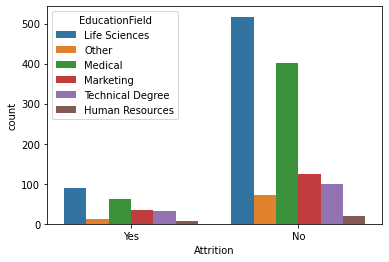

In [69]:
sns.countplot(x='Attrition', hue= 'EducationField', data = data)
plt.show()

 - We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies

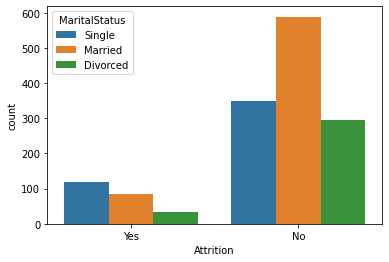

In [70]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = data)
plt.show()

- We can clearly see that the Singles are more likely to attrition as they don't care as much for a stable static life as the married employees.

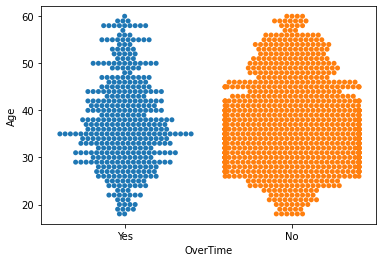

In [71]:
sns.swarmplot(x="OverTime", y="Age",data=data)
plt.show()

 - We can see, 27 to 42 at this age group the employees willing to do overtime.
 - But at same age group, the employee dont want to do overtime.
 - Proportion of 'No' is higher then 'Yes'.

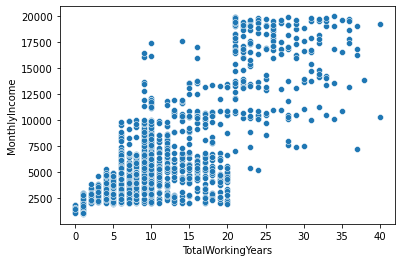

In [72]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=data)
plt.show()

 - As we can see, Monthly income and total working year has linear relationship with each other.
 - As total working year increases then monthly income also increases.

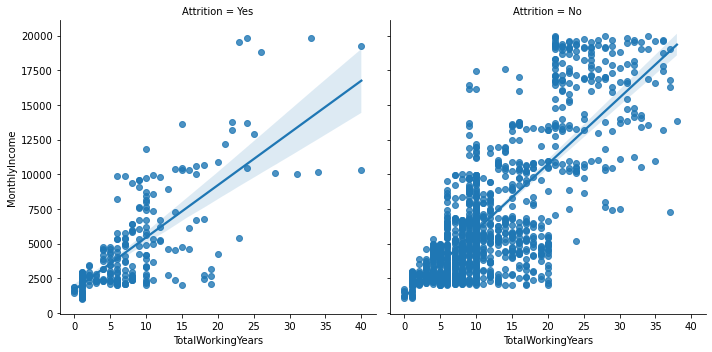

In [73]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = data, col = 'Attrition')
plt.show()

- We can see that, the employees who had more working years in the company they are more attached to their jobs, as they also have a higher monthly income.
- We can see, Both Attrition has linear relation to both features.

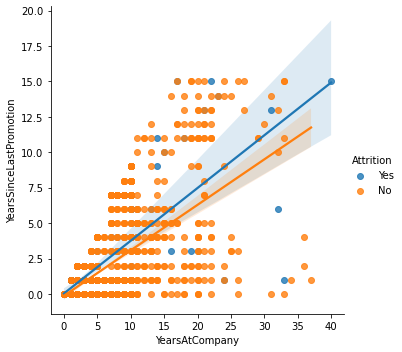

In [74]:
sns.lmplot(x = 'YearsAtCompany', y = 'YearsSinceLastPromotion', data = data, hue='Attrition')
plt.show()

- We can see, YearsAtCompany has linear relation with year since last promotion.
- Attrition 'No' is higher then Attrition 'Yes'.

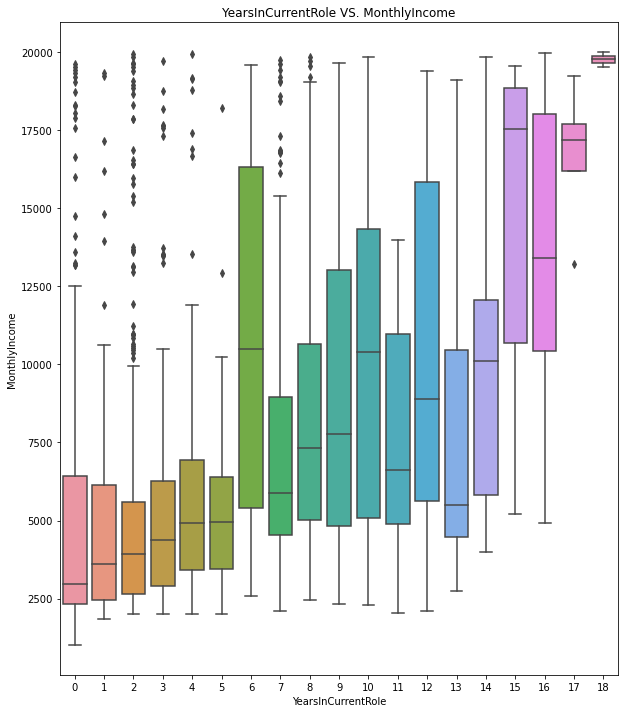

In [75]:
plt.figure(figsize=(10,12))
sns.boxplot(x='YearsInCurrentRole',y='MonthlyIncome',data=data)
plt.title('YearsInCurrentRole VS. MonthlyIncome')
plt.show()

 - Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role !!

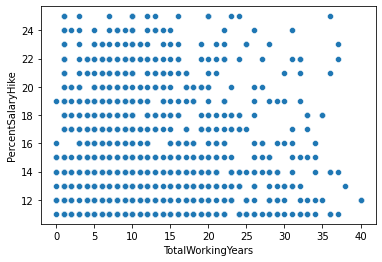

In [76]:
sns.scatterplot(x = 'TotalWorkingYears', y = 'PercentSalaryHike', data = data)
plt.show()

- It does not have any relationship with each other.


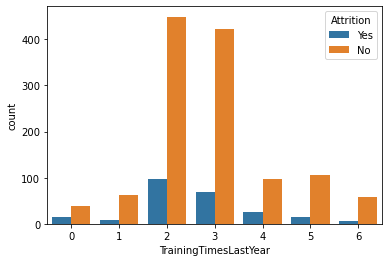

In [77]:
sns.countplot(x='TrainingTimesLastYear', hue= 'Attrition', data = data)
plt.show()

- We can see, Those employees are doing last year training. They have Attrition 'Yes'.
- Who had 2 TrainingTimesLastYear, they have more Attrition 'No'.

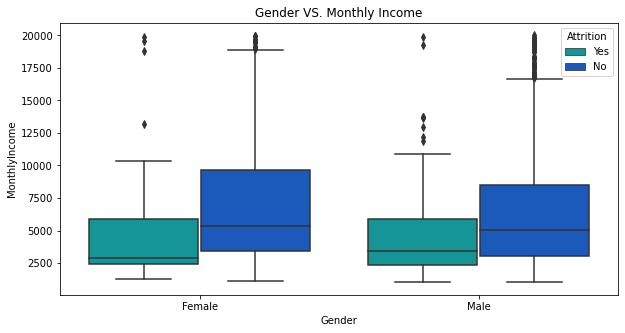

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender",y="MonthlyIncome",data=data, hue='Attrition',palette='winter_r')
plt.title("Gender VS. Monthly Income")
plt.show()

- As we can see, Female has little more monthly income then male.
- We can see, monthly income is affect the attrition.
- Male Attrition is higher then female.

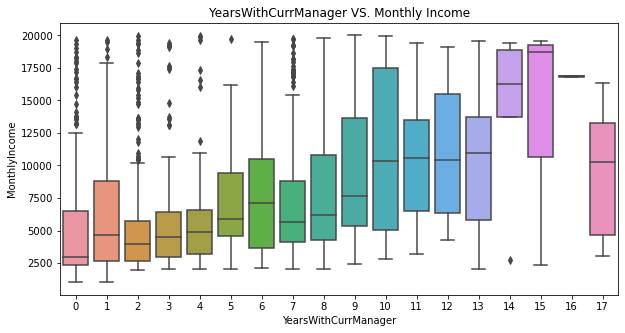

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x="YearsWithCurrManager",y="MonthlyIncome",data=data)
plt.title("YearsWithCurrManager VS. Monthly Income")
plt.show()

- We can see, If you working with same manager sor several year it will increases monthly income.

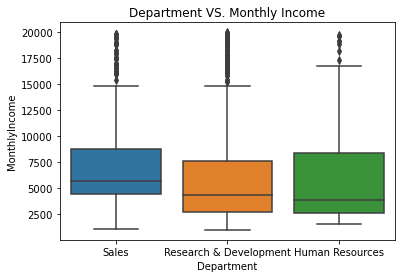

In [80]:
sns.boxplot(x="Department",y="MonthlyIncome",data=data)
plt.title("Department VS. Monthly Income")
plt.show()

 - We can see, Sales has highest monthly income. Whose working in sales department those are having higher salary then other.
 - Research and Development department have lower salaries then HR.

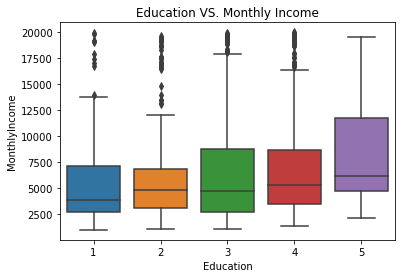

In [81]:
sns.boxplot(x="Education",y="MonthlyIncome",data=data)
plt.title("Education VS. Monthly Income")
plt.show()

- We can see, +2 employees are having lower monthly income than others.
- Doctor degree holding employees is having highest monthly income.

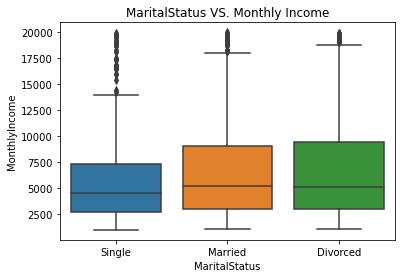

In [82]:
sns.boxplot(x="MaritalStatus",y="MonthlyIncome",data=data)
plt.title("MaritalStatus VS. Monthly Income")
plt.show()

- we can see single employees have low MonthlyIncome compared by other, so that's why they leave more.
- Divorced employees have high monthly income then others.

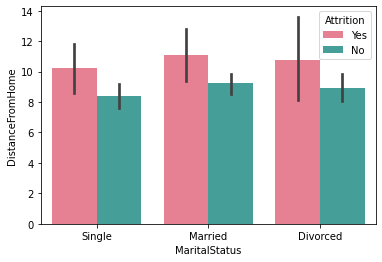

In [83]:
sns.barplot(x='MaritalStatus',y='DistanceFromHome',hue='Attrition',palette='husl',data=data)
plt.show()

- Married employees have more attrition rate then other.
- Married employees have distance from home is high thay why thye might willing to left job.

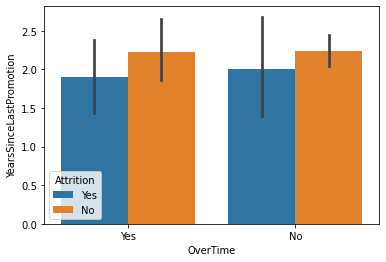

In [84]:
sns.barplot(x='OverTime',y='YearsSinceLastPromotion',hue='Attrition',data=data)
plt.show()

- Employees who put more efforts by working overtime seems to take an average more years to get promoted.
- And such treatment by the company could demotivate the hardworking employees and thay why they leaving the company.

## 4. Encoding of DataFrame

### Label Encoding

In [85]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
 
data['Attrition']= label_encoder.fit_transform(data['Attrition'])
data['Attrition'].unique()

array([1, 0])

In [86]:
data['BusinessTravel']= label_encoder.fit_transform(data['BusinessTravel'])
data['BusinessTravel'].unique()

array([2, 1, 0])

In [87]:
data['Department']= label_encoder.fit_transform(data['Department'])
data['Department'].unique()

array([2, 1, 0])

In [88]:
data['EducationField']= label_encoder.fit_transform(data['EducationField'])
data['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [89]:
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([0, 1])

In [90]:
data['JobRole']= label_encoder.fit_transform(data['JobRole'])
data['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1])

In [91]:
data['MaritalStatus']= label_encoder.fit_transform(data['MaritalStatus'])
data['MaritalStatus'].unique()

array([2, 1, 0])

In [92]:
data['OverTime']= label_encoder.fit_transform(data['OverTime'])
data['OverTime'].unique()

array([1, 0])

In [93]:
data['Over18']= label_encoder.fit_transform(data['Over18'])
data['Over18'].unique()

array([0])

In [94]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


## 5. Describe the Dataset

In [95]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in DailyRate,MonthlyIncome and MonthlyRate is high, columns is considerable indicating presence of outliers.
 - MonthlyIncome Mean to Standrad of deviation difference is close.

## Correlation of the features with target column

In [96]:
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

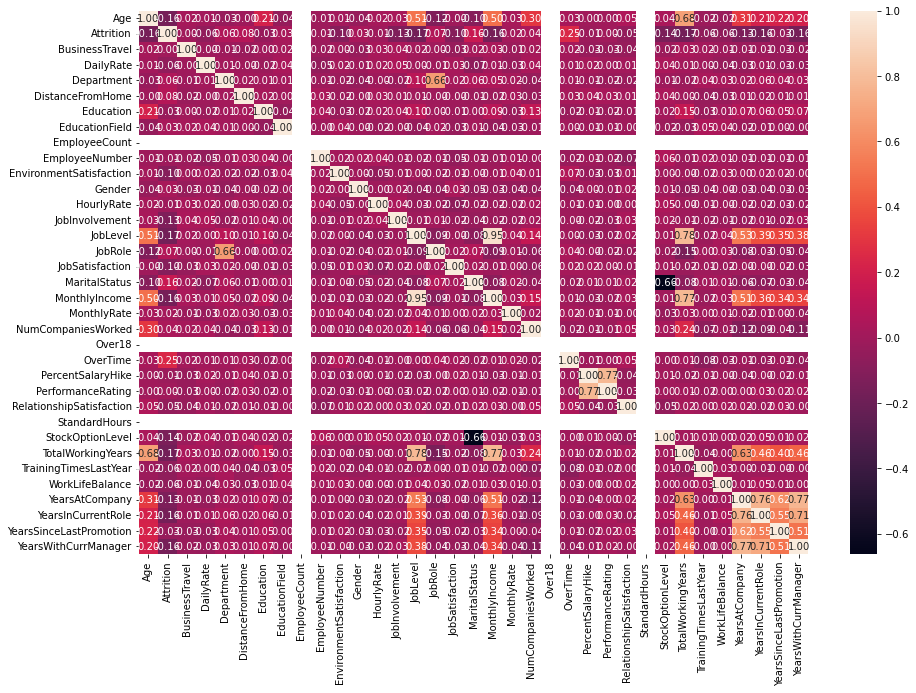

In [97]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. JobLevel has 51% positive correlation with target column.
 2. MonthlyIncome has 51% positive correlation with target column.
 3. TotalWorkingYear has 68% positve correlation with target column.
 4. JobSatisfaction, PercentageSalaryHike and PerformanceRating has 0% correlation with target column.
 5. Age has 68% positive correlation with TotalWorkingYaer.
 6. Department has 66% positive correlation with JobRole.
 7. JobLevel has 95% positive correlation with MonthlyIncome and 78% positive correlation with TotalWorkingYear.
 8. MonthlyIncome has 77% positive correlation with TotalWorkingYear.
 9. PercentSalaryHike has 77% positive correlation with PerformanceRating.
 10. TotalWorkinYear has 63% positive correlation with YearAtCompany.
 11. YearAtCompany has 77% and 76%  positive correlation with YearWithCurrManager and YearSinCurrRole.
 

## Visualizing correlation of feature columns with label column.

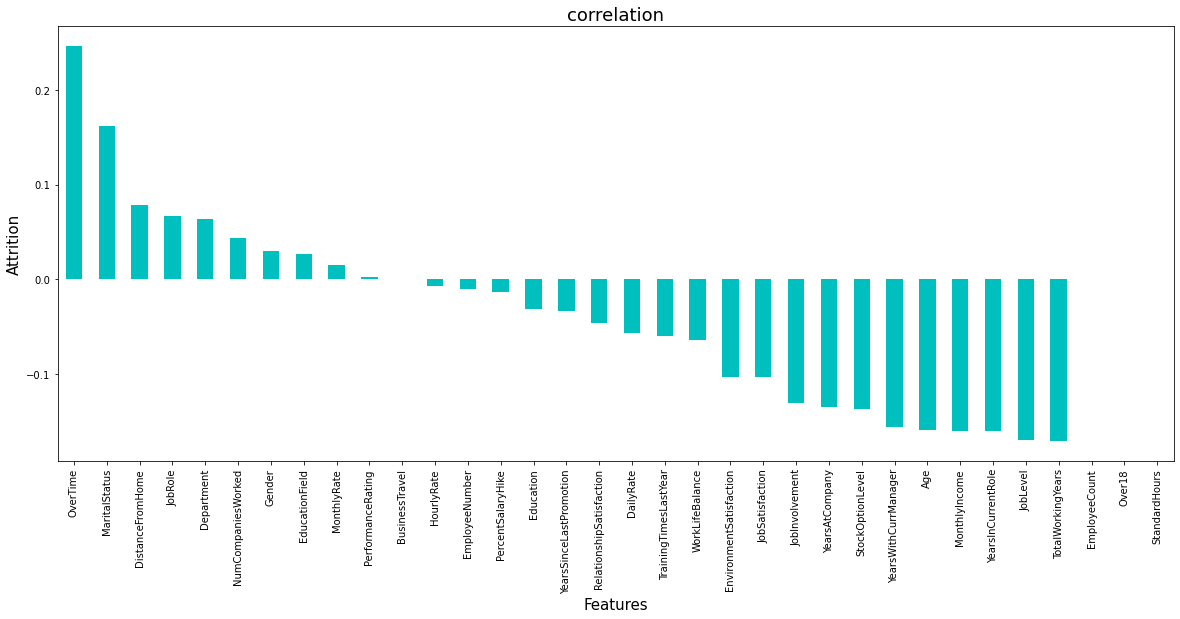

In [98]:
plt.figure(figsize = (20,8))
data.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that OverTime, MaritalStatus and DistanceFromHome have the highest positive correlation with Attrition.
- While TotalWorkingYear,JobLevel and YearSinCurrRole have the highest negative correlation with Attrition.

## Checking Distribution of data

In [99]:
data.shape

(1470, 35)

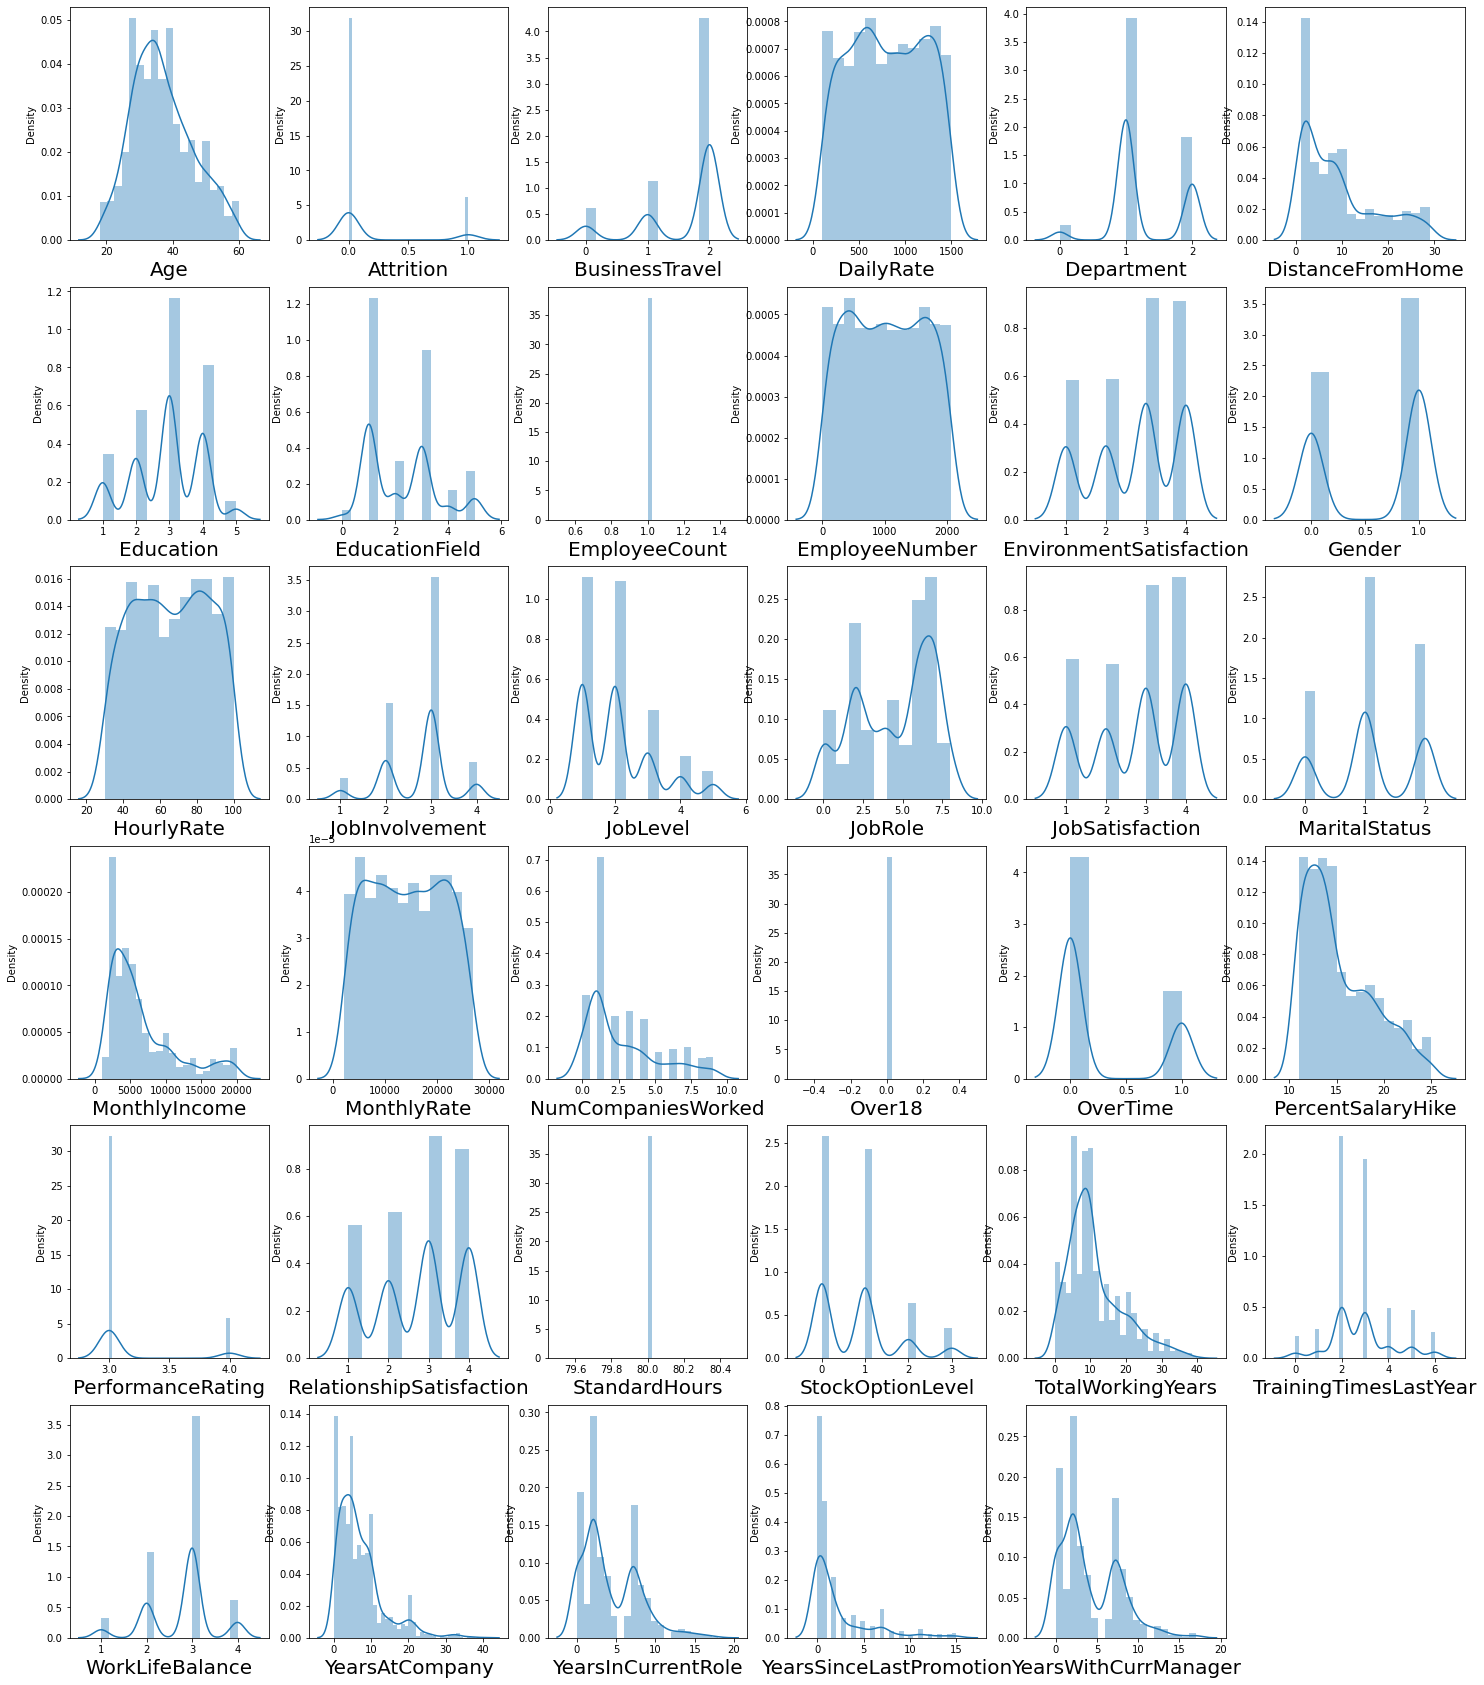

In [100]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- All feature seem to skewed.
- We can see, Age and MonthlyIncome are positively skewed.
- JobRole and WorkLifeBalance are Negatice skewd 

In [101]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65.
 - Almost all continuous data are having skewness.

## Checking Outliers

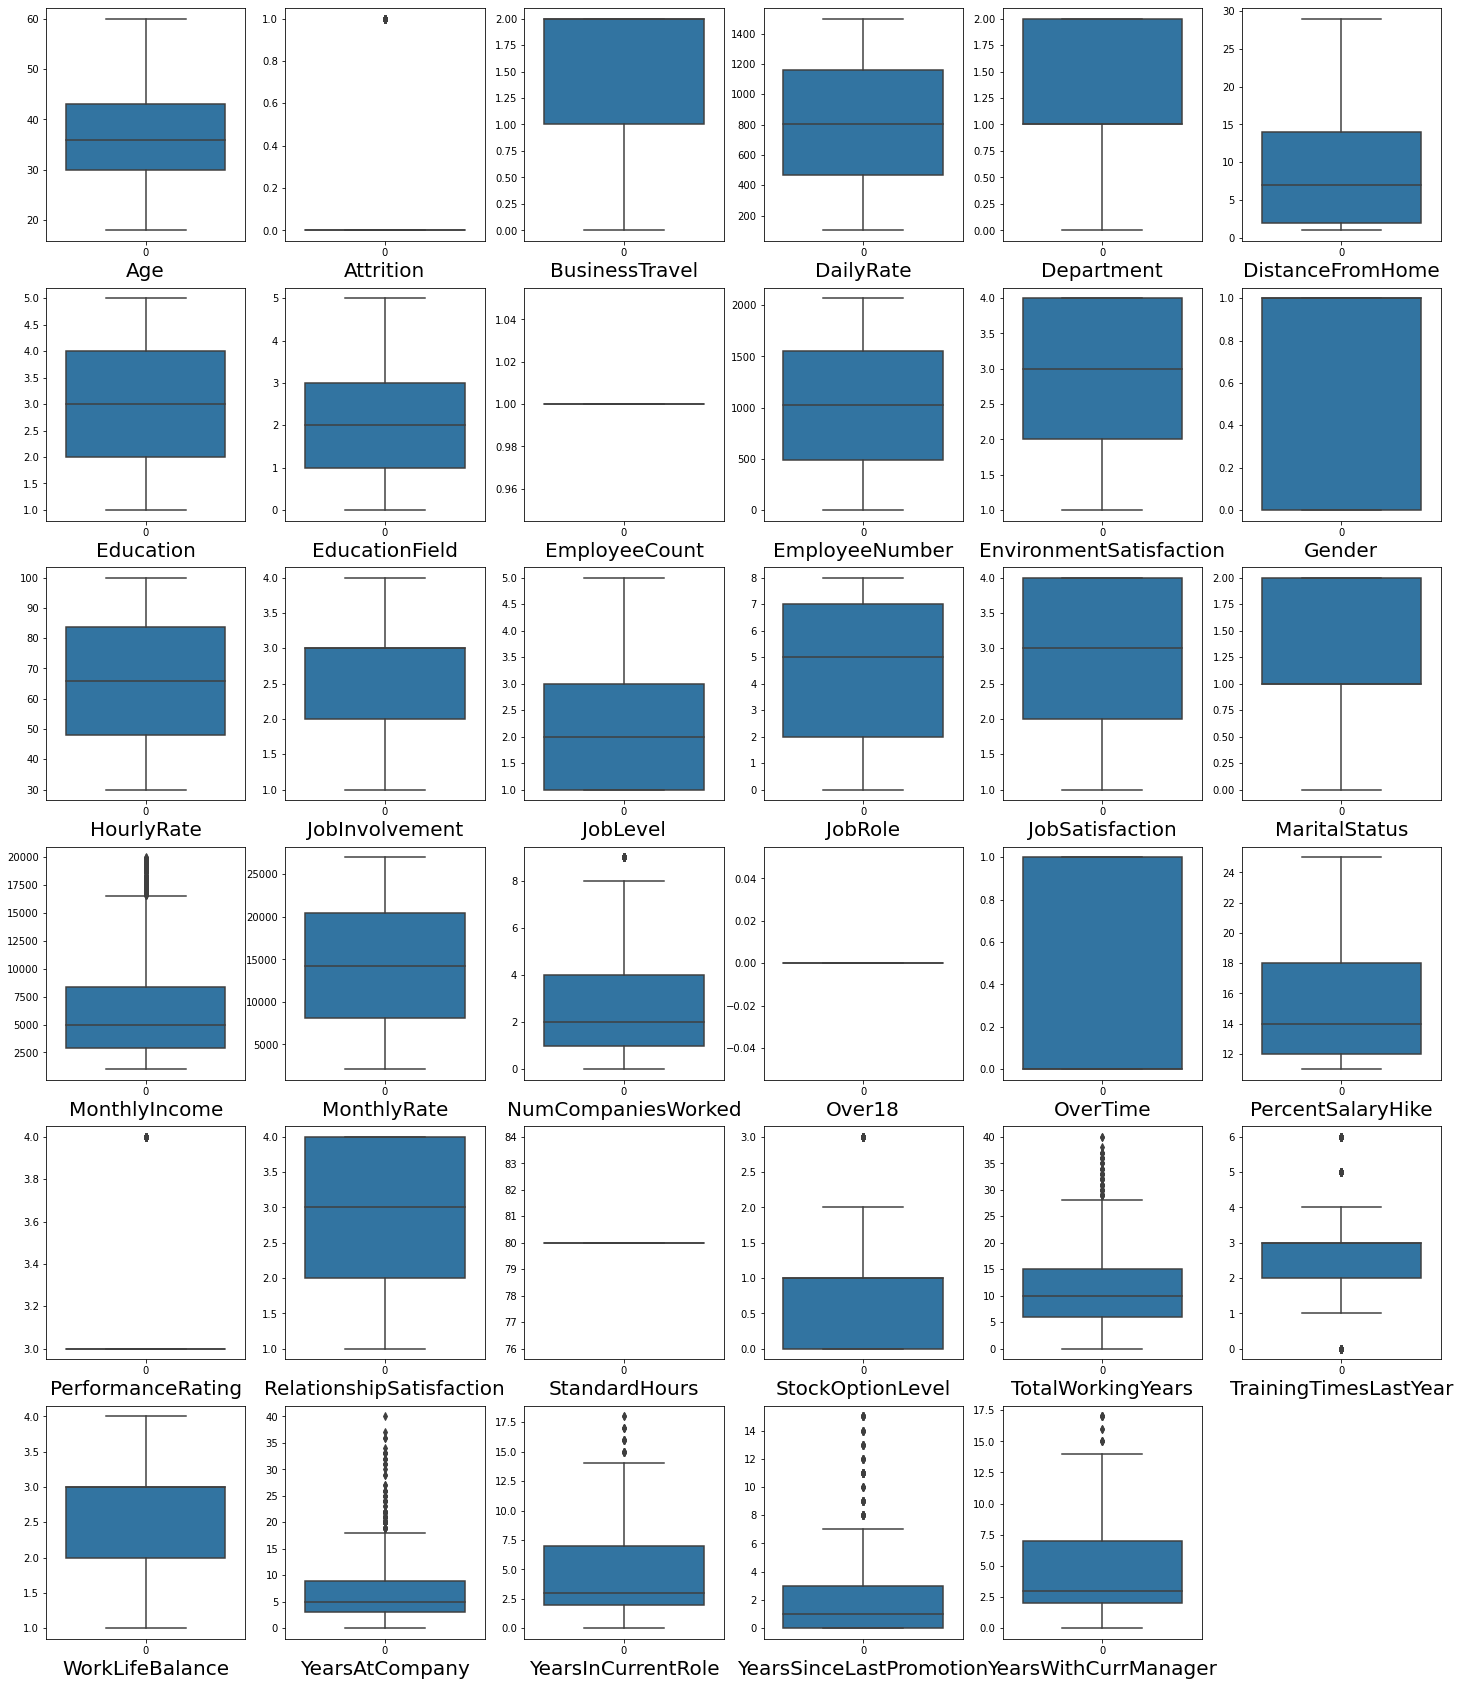

In [102]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=36:
        plt.subplot(6,6,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

 - MonthlyIncome, TotalWorkingYear, YearSinCurrRole,YearAtCompany, YearSinceLastPromotion are have a more Outliers.
 - Some feature are not having outliers but those are categorical features.
 - But some categorical features is having outliers.

### Removing Outliers

In [103]:
from scipy.stats import zscore

z_score = zscore(data[['DailyRate','MonthlyIncome','MonthlyRate']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [104]:
df.shape

(1470, 35)

In [105]:
data.shape

(1470, 35)

### Percentage of data loss

In [106]:
data_loss = ((1470 - 1470)/1470*100)
print(data_loss,'%')

0.0 %


#### Data skewness before removing

In [107]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

#### Data skewness after removing

In [108]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

## 6.  Checking Multicollinearity

In [109]:
x = df.drop(columns=['Attrition'],axis=1)
y = df['Attrition']

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif = pd.DataFrame()

In [114]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Age,2.054226
1,BusinessTravel,1.016808
2,DailyRate,1.026401
3,Department,1.942165
4,DistanceFromHome,1.018096
5,Education,1.065295
6,EducationField,1.016240
7,EmployeeCount,NaN
8,EmployeeNumber,1.022699
9,EnvironmentSatisfaction,1.018022


 - If VIF > 10, It means multicollinearity is present.
 - MultiCollinearity exists in JobLevel, Monthlyincome, Based on ANOVA F scores.
 - Those features is having lowest correlation with target column that feature will be dropped.

In [115]:
## Droping features
df.drop(["JobLevel","MonthlyIncome", "StandardHours", "Over18", "EmployeeCount"], axis=1, inplace=True)

In [116]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [122]:
df.shape

(1470, 30)

In [123]:
x = df.drop(columns=['Attrition'],axis=1)
y = df['Attrition']

In [124]:
x.shape

(1470, 29)

In [125]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [126]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## 7. Selecting Kbest Features

In [127]:
from sklearn.feature_selection import SelectKBest, f_classif

In [128]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [129]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(29,'Score'))

                     Feature      Score
17                  OverTime  94.656457
22         TotalWorkingYears  44.252491
14             MaritalStatus  39.599763
26        YearsInCurrentRole  38.838303
0                        Age  38.175887
28      YearsWithCurrManager  36.712311
21          StockOptionLevel  28.140501
25            YearsAtCompany  27.001624
11            JobInvolvement  25.241985
13           JobSatisfaction  15.890004
8    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
12                   JobRole   6.649672
3                 Department   6.035877
24           WorkLifeBalance   6.026116
23     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
20  RelationshipSatisfaction   3.095576
16        NumCompaniesWorked   2.782287
27   YearsSinceLastPromotion   1.602218
5                  Education   1.446308
9                     Gender   1.274587
6             EducationField   1.058726
15               MonthlyRate   0.337916


### Selecting best features based on their scores:

In [130]:
x_best = x.drop(columns=['BusinessTravel']).copy()

In [131]:
scaled_x_best = scaler.fit_transform(x_best)

In [132]:
from sklearn.preprocessing import power_transform
x = power_transform(scaled_x_best,method='yeo-johnson')

In [133]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.53321272,  0.7426873 ,  1.33496966, ...,  0.18163283,
        -1.02676749,  0.48849783],
       [ 1.2733487 , -1.29805535, -0.43631752, ...,  0.91811918,
        -0.07903257,  0.94078016],
       [ 0.11376982,  1.4139673 , -0.43631752, ..., -1.46868547,
        -1.02676749, -1.42403461],
       ...,
       [-1.14338765, -1.60577769, -0.43631752, ..., -0.54468784,
        -1.02676749, -0.12491782],
       [ 1.2733487 ,  0.54694917,  1.33496966, ...,  0.70617644,
        -1.02676749,  1.13157505],
       [-0.23410538, -0.43224379, -0.43631752, ..., -0.15543187,
        -0.07903257, -0.51004319]])

## 8. Balancing Datasaet

In [135]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [136]:
smt_y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# 9. Building Model

In [134]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 9.1 LogisticRegression

### Finding Best Random state

In [137]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8175675675675675 on Random State 173


In [141]:
 x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=173)

In [142]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.8175675675675675

### Cross - validation for logistic Regression

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [145]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.0063158985902
accuracy_score is:- 81.75675675675676


At cv:- 5
Cross validation score is:- 87.14285714285714
accuracy_score is:- 81.75675675675676


At cv:- 6
Cross validation score is:- 87.21088435374149
accuracy_score is:- 81.75675675675676


At cv:- 7
Cross validation score is:- 87.27891156462587
accuracy_score is:- 81.75675675675676


At cv:- 8
Cross validation score is:- 87.41535994297934
accuracy_score is:- 81.75675675675676


At cv:- 9
Cross validation score is:- 87.07499958435167
accuracy_score is:- 81.75675675675676




In [146]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8741535994297933 
The accuracy score is:  0.8175675675675675


In [147]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## 9.2 Random Forest Classifier

### Finding Best Random State

In [149]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9581081081081081 on Random State 189


In [150]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=189)

In [151]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 95.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       368
           1       0.97      0.94      0.96       372

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740


 Confusion Matrix: 
 [[359   9]
 [ 23 349]]


### Cross - Validation for Random Forest classifier

In [152]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [153]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 85.44214992299491
accuracy_score is:- 95.67567567567568


At cv:- 5
Cross validation score is:- 85.23809523809524
accuracy_score is:- 95.67567567567568


At cv:- 6
Cross validation score is:- 84.89795918367346
accuracy_score is:- 95.67567567567568


At cv:- 7
Cross validation score is:- 85.85034013605443
accuracy_score is:- 95.67567567567568


At cv:- 8
Cross validation score is:- 85.78306901876931
accuracy_score is:- 95.67567567567568


At cv:- 9
Cross validation score is:- 85.57949689926346
accuracy_score is:- 95.67567567567568




In [154]:
lsscore_selected = cross_val_score(rf,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8598639455782313 
The accuracy score is:  0.9567567567567568


## 9.3 Gradient Boosting Classifier

### Finding Best Random State

In [155]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9445945945945946 on Random State 9


In [156]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=9)

In [157]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 96.52%

==========================Test Result=======================
Accuracy Score: 94.46%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       369
           1       0.97      0.91      0.94       371

    accuracy                           0.94       740
   macro avg       0.95      0.94      0.94       740
weighted avg       0.95      0.94      0.94       740


 Confusion Matrix: 
 [[360   9]
 [ 32 339]]


### Cross - validation For GradientBoosting Classifier

In [158]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [159]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 85.71481459542709
accuracy_score is:- 94.45945945945947


At cv:- 5
Cross validation score is:- 85.71428571428571
accuracy_score is:- 94.45945945945947


At cv:- 6
Cross validation score is:- 85.85034013605441
accuracy_score is:- 94.45945945945947


At cv:- 7
Cross validation score is:- 85.4421768707483
accuracy_score is:- 94.45945945945947


At cv:- 8
Cross validation score is:- 86.8035756711808
accuracy_score is:- 94.45945945945947


At cv:- 9
Cross validation score is:- 85.71458260594875
accuracy_score is:- 94.45945945945947




In [160]:
lsscore_selected = cross_val_score(gbc,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8659977132335471 
The accuracy score is:  0.9445945945945946


## 9.4  SVC

### Finding Best Random State

In [162]:
from sklearn.svm import SVC

In [163]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9418918918918919 on Random State 769


In [164]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=769)

In [165]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 95.48%

==========================Test Result=======================
Accuracy Score: 94.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       354
           1       0.93      0.96      0.95       386

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740


 Confusion Matrix: 
 [[327  27]
 [ 16 370]]


### Cross - Validation for SVC

In [166]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [167]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 86.19017296528847
accuracy_score is:- 94.1891891891892


At cv:- 5
Cross validation score is:- 86.59863945578232
accuracy_score is:- 94.1891891891892


At cv:- 6
Cross validation score is:- 86.12244897959184
accuracy_score is:- 94.1891891891892


At cv:- 7
Cross validation score is:- 86.25850340136054
accuracy_score is:- 94.1891891891892


At cv:- 8
Cross validation score is:- 86.39485329056782
accuracy_score is:- 94.1891891891892


At cv:- 9
Cross validation score is:- 86.19216253512228
accuracy_score is:- 94.1891891891892




In [168]:
lsscore_selected = cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8659863945578232 
The accuracy score is:  0.9418918918918919


## 9.5 KNN

### Finding Random State

In [169]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8364864864864865 on Random State 87


In [170]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=87)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 85.98%

==========================Test Result=======================
Accuracy Score: 83.65%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.66      0.79       347
           1       0.77      0.99      0.87       393

    accuracy                           0.84       740
   macro avg       0.88      0.83      0.83       740
weighted avg       0.87      0.84      0.83       740


 Confusion Matrix: 
 [[230 117]
 [  4 389]]


### Cross - Validation for KNN

In [172]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [173]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 85.30628035777752
accuracy_score is:- 83.64864864864865


At cv:- 5
Cross validation score is:- 85.3061224489796
accuracy_score is:- 83.64864864864865


At cv:- 6
Cross validation score is:- 85.4421768707483
accuracy_score is:- 83.64864864864865


At cv:- 7
Cross validation score is:- 85.4421768707483
accuracy_score is:- 83.64864864864865


At cv:- 8
Cross validation score is:- 85.44339510572583
accuracy_score is:- 83.64864864864865


At cv:- 9
Cross validation score is:- 85.37499792175835
accuracy_score is:- 83.64864864864865




In [174]:
lsscore_selected = cross_val_score(knn,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.854421768707483 
The accuracy score is:  0.8364864864864865


## 10.  Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined KNeighborsClassifier is the best model. It has least difference between accuracy score and cross validation.

## 11. Hyperparameter Tuning

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
param_grid = { 'algorithm'  : ['kd_tree', 'brute'],
               'leaf_size'  : [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13],
              'weights' : ['uniform','distance'],
             }

In [188]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 3,
 'n_neighbors': 3,
 'weights': 'distance'}

In [224]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=5, n_neighbors=1, weights = 'distance')

In [225]:
knn.fit(x_train,y_train)
metric_score(knn,x_train,x_test,y_train, y_test, train=False)


==========================Test Result=======================
Accuracy Score: 86.22%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83       346
           1       0.80      1.00      0.89       394

    accuracy                           0.86       740
   macro avg       0.90      0.85      0.86       740
weighted avg       0.89      0.86      0.86       740


 Confusion Matrix: 
 [[245 101]
 [  1 393]]


## 12. ROC_AUC Curve

In [230]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

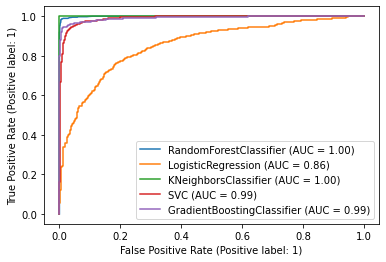

In [231]:
# AUC Curve For Training
disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 1440x1080 with 0 Axes>

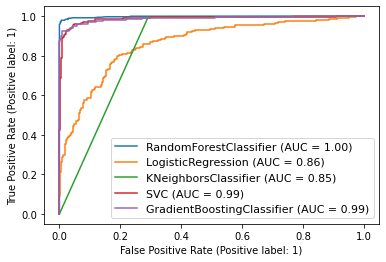

In [232]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## 13. Documenting The Findings
- It’s better for company to get employees at young age as they are more likely to stay.


- It’s better for company to get single employees as they are more likely to stay. But have some consequences i.e. They are very free bird, they dont have that much of responsibilies as married employees have. So need to have balance this by giving some incentive to single(marital status) employees.



- It’s better for company to hire more female employees due this we will avoiding the gender based discrimination. As we find that men are more likely to leave the company and increase the attrition rate.


- Company should have to hire employees at any education degree except bachelor becouse bachelor degree holder have a higher rate of attrition. But its very difficut task to company to get employees other than bachelor. So avoing this company need to implement contract system where employee are bound to be company asset for perticular year.


- Company should have to give more focus on research and development department because it is backbone of company. This department have higher attrition among the other department. For avoiding attrition company should have to increases salaries of this departmenat. And one more thing that, company need to spend more in R&D apart from increasing salaries like instrument, budget etc.


- It’s better for company to keep maintain relationship of employees with their managers without replacing them  becouse some employees are very comfortable  to their manager. As new manager are come, employees will take a time to adjust with or make bond with new manager. 


- Company should have to take care of, more employees’ satisfaction in joblevel, environment,...etc. It has a highly affected to the attrition rate.


- Company really should appreciate their employees who stayed more than 10 years by still giving promotion and incentives.

## 14. Model Save

In [234]:
import joblib
joblib.dump(gbc,"HR_Analytics_project.pkl")

['HR_Analytics_project.pkl']

### Loading the Model

In [235]:
mod=joblib.load("HR_Analytics_project.pkl")

In [236]:
print(mod.predict(x))

[1 0 1 ... 0 0 0]


In [237]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.sample(10)

,Predictions,Actual Values
360,0,0
1262,1,1
1295,0,0
422,1,1
648,0,0
1213,0,1
620,0,0
1443,0,0
208,0,0
1358,0,0
